In [26]:
import sys
sys.path.append('gpib_instrument_control/')
import skrf as rf
import scipy.io as sio
import gpib_instrument_control.hp_3478a
import gpib_instrument_control.hp_8700_series_vna
import gpib_instrument_control.vna_fixture
import wiltron_6659a
import wavetek_8502

#import gpib_instrument_control.switch_calkit
import matplotlib.pyplot as plt
import numpy as np
import time

sw = wiltron_6659a.Wiltron6659A()
pm = wavetek_8502.Wavetek8502()
hp3478 = gpib_instrument_control.hp_3478a.Hp3478A()
vna = gpib_instrument_control.hp_8700_series_vna.Hp8753A()

#calkit = gpib_instrument_control.switch_calkit.SwitchCalkit(None, serialPortPath='/dev/ttyUSB0')
calkit = None
fixture = gpib_instrument_control.vna_fixture.VnaFixture(vna, calkit, 130e6, 20e9, 1e6, 'measured_stds/', 'data/cal_stds/') 
#calkit.device.write(b'N')

fr = np.linspace(10e6, 26.5e9, 300)

b'HEWLETT PACKARD,8703A,0,1.00\n'
Success
Success
Success
Success


In [11]:
dirDetOnPcb=fixture.calibratedMeasure()
dirDetOnPcb.write_touchstone('directional_detector_6_to_18ghz/j2_to_j15.s2p')

In [14]:
cable=fixture.calibratedMeasure()
cable.write_touchstone('directional_detector_6_to_18ghz/cable_from_sweeper_to_detector_input.s2p')

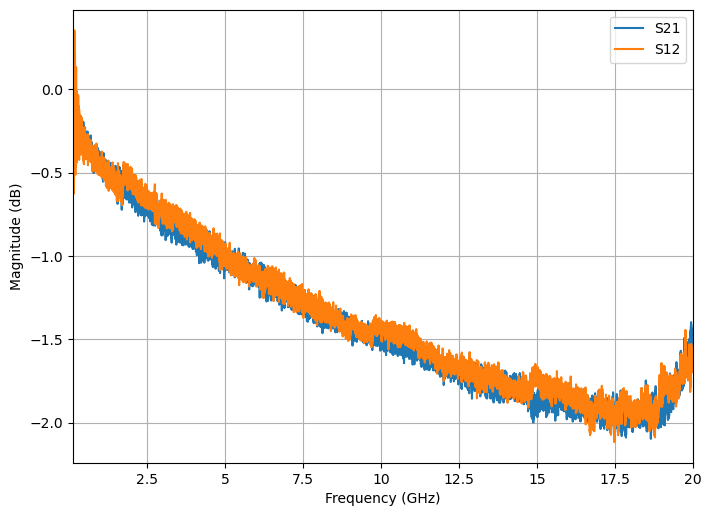

In [24]:
plt.figure(figsize=(8, 6), dpi=100)
cable.plot_s_db(m=1, n=0);
cable.plot_s_db(m=0, n=1);
plt.grid(True)

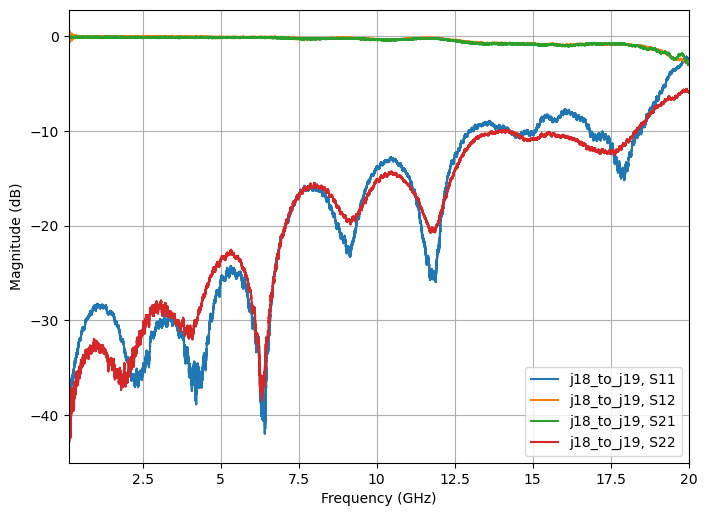

<Figure size 432x288 with 0 Axes>

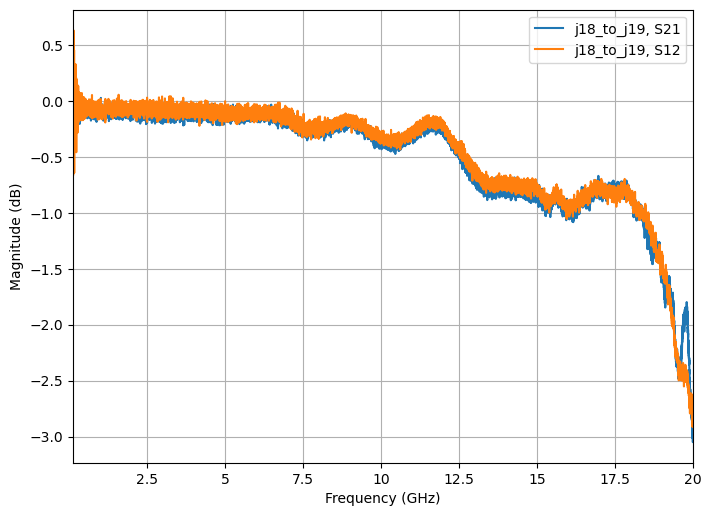

In [12]:
pcb = rf.Network('pcb_through/j18_to_j19.s2p')
dirDet=rf.de_embed(pcb, dirDetOnPcb)
plt.figure(figsize=(8, 6), dpi=100)
dirDet.plot_s_db();
plt.grid(True)

plt.figure()
plt.figure(figsize=(8, 6), dpi=100)
dirDet.plot_s_db(m=1, n=0);
dirDet.plot_s_db(m=0, n=1);
plt.grid(True)

In [21]:
levels = np.arange(-6, 16)
print(levels)
p = []
v = []
sw.setCwFreq(fr[0])
time.sleep(10)
for f in fr:
        ls = []
        vs = []
        sw.setCwFreq(f)
        time.sleep(1)
        for pl in levels:
            sw.setLevel(pl)
            time.sleep(1)
            ls.append(pm.readChannelA(f))
            vs.append(hp3478.readValue())
        p.append(ls)
        v.append(vs)
    

[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


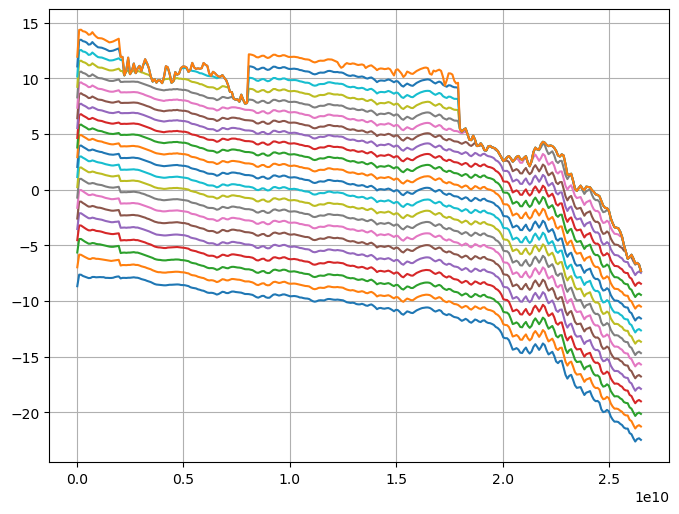

In [22]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fr, p)
plt.grid(True)

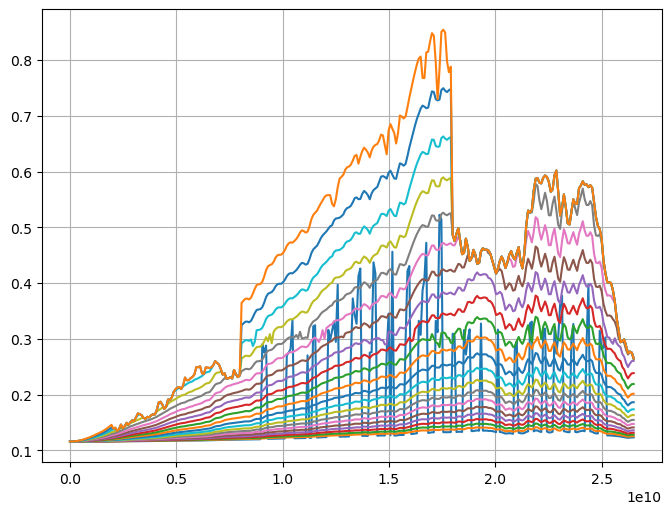

In [23]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fr, v)
plt.grid(True)

In [31]:
sio.savemat('directional_detector_6_to_18ghz/sweep.mat', {'frequencies':fr, 'power_output':np.array(p), 'detector_voltage':v, 'power_levels':levels})